https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

In [3]:
gold_df = pd.read_csv("/content/gold_standard.csv")
gold_df = gold_df.iloc[:, 1:]
gold_df = gold_df.set_index("ID")
gold_df = gold_df.sort_index()
gold_df.columns = range(gold_df.shape[1])

puresemi_df = pd.read_csv("/content/puresemi_lsvc_0.4.csv", header=None)
puresemi_df = puresemi_df.set_index(0)
puresemi_df = puresemi_df.sort_index()
puresemi_df.columns = range(puresemi_df.shape[1])
puresemi_df.index.names = ["ID"]

In [4]:
gold_df.head()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
ID                                                                      
AD-10007   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1
AD-10014   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
AD-10023   1   1   0   1   0   0   0   0   0   0   0   0   1   0   0   0
AD-10035   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   1
AD-1005    1   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0

In [5]:
gold_df.tail()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
ID                                                                     
TD-9      0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1
TD-9226   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1
TD-9825   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
TD-9986   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
TD-9991   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0

In [6]:
puresemi_df.head()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
ID                                                                      
AD-10007   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1
AD-10014   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
AD-10023   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0
AD-10035   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
AD-1005    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [7]:
gold_np = gold_df.to_numpy()
puresemi_np = puresemi_df.to_numpy()

In [8]:
def perf_print(truedata, predicted):
    # print("Hasil Evaluasi:\n\n%s\n" % (classification_report(truedata, predicted)))
    print('Accuracy:', accuracy_score(truedata, predicted))
    print('Precision Macro Average:', precision_score(truedata, predicted, average='macro'))
    print('Precision Micro Average:', precision_score(truedata, predicted, average='micro'))
    print('Recall Macro Average:', recall_score(truedata, predicted, average='macro'))
    print('Recall Micro Average:', recall_score(truedata, predicted, average='micro'))
    print('F1 Macro Average:', f1_score(truedata, predicted, average='macro'))
    print('F1 Micro Average:', f1_score(truedata, predicted, average='micro'))

In [9]:
perf_print(gold_df, puresemi_df)

Accuracy: 0.6019815510761872
Precision Macro Average: 0.7495482041227911
Precision Micro Average: 0.7685498568081229
Recall Macro Average: 0.6657561540703449
Recall Micro Average: 0.6549811404481917
F1 Macro Average: 0.7000302161275935
F1 Micro Average: 0.7072352659319597


In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

def anal_ysis(truedata, predicted):
    classify = classification_report(truedata, predicted)
    r2 = classify.split()
    r3 = r2[4:-24]
    r4 = r2[-24:]
    detail = []
    prec = []
    recall = []
    f1 = []
    support = []
    r_total = []

    for i in range(16):
      counter = i * 5
      detail.append(i)
      prec.append(float(r3[counter + 1]))
      recall.append(float(r3[counter + 2]))
      f1.append(float(r3[counter + 3]))
      support.append(float(r3[counter + 4]))

    for i in range(4):
      counter = i * 6
      word = (str)(r4[counter]) + " " + (str)(r4[counter + 1])
      detail.append(word)
      prec.append(float(r4[counter + 2]))
      recall.append(float(r4[counter + 3]))
      f1.append(float(r4[counter + 4]))
      support.append(float(r4[counter + 5]))

    for i in range(20):
      temp = []
      temp.append(detail[i])
      temp.append(prec[i])
      temp.append(recall[i])
      temp.append(f1[i])
      temp.append(support[i])
      r_total.append(temp)
    dftt = pd.DataFrame(data=r_total, columns=["detail", "prec", "recall", "f1", "support"])
    return dftt
def visualize(df):
    r = df[:16]
    x = np.array(r["detail"])
    y = np.array(r["prec"])
    z = np.array(r["recall"])
    k = np.array(r["f1"])
    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)
    w = 0.2
    print(x)
    print(y)
    ax.bar(x-w, y, width=w, color='#aaabbb', align='edge')
    ax.bar(x, z, width=w, color='#cccddd', align='edge')
    ax.bar(x+w, k, width=w, color='#eeefff', align='edge')

    ax.legend(['precision', 'recall', 'f1-score'])

    plt.show()

In [11]:
anal = anal_ysis(gold_df, puresemi_df)

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
[0.84 0.77 0.78 0.8  0.8  0.82 0.91 0.8  0.72 0.8  0.68 0.74 0.63 0.78
 0.45 0.67]


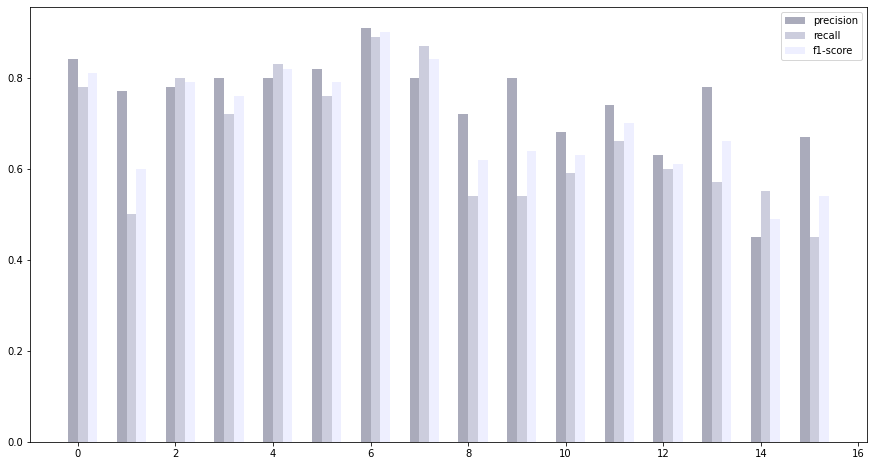

In [12]:
visualize(anal)

In [16]:
deeplearning_df = pd.read_csv("/content/DeepLearningFT.csv", header=None)
deeplearning_df = deeplearning_df.set_index(0)
deeplearning_df = deeplearning_df.sort_index()
deeplearning_df.columns = range(deeplearning_df.shape[1])
deeplearning_df.index.names = ["ID"]

deeplearning_df[deeplearning_df.isna().any(axis=1)] = 0
deeplearning_df[deeplearning_df.isna().any(axis=1)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []

In [17]:
perf_print(gold_df, deeplearning_df)

Accuracy: 0.015715749914588316
Precision Macro Average: 0.12098079520027535
Precision Micro Average: 0.19303557910673733
Recall Macro Average: 0.03776862689905085
Recall Micro Average: 0.05657865542489461
F1 Macro Average: 0.05483665647565768
F1 Micro Average: 0.08750857927247768


In [ ]:
rule_df = pd.read_csv("/content/RuleResult.csv", header=None)
rule_df = rule_df.set_index(0)
rule_df = rule_df.sort_index()
rule_df.columns = range(rule_df.shape[1])
rule_df.index.names = ["ID"]

In [ ]:
rule_df.head()

In [ ]:
perf_print(gold_df, rule_df)